# Cardio Good Fitness Project

## Description
### Objective - Data Analysis of Cardio Good Fitness Products.
1. Customer profile (characteristics of a customer) of the different products
2. Perform uni-variate and multi-variate analyses
3. Insights and recommendations that will help the company in targeting new customers

## Importing Data Set and Understanding the data

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import locale
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [76]:
# Importing Data
cardiogf = pd.read_csv(r'C:\Users\alisantos\Downloads\CardioGoodFitness.csv')

In [77]:
# Check top 10 rows
cardiogf.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


## Understanding each column:
1. Product - the model no. of the treadmill
2. Age - in no of years, of the customer
3. Gender - of the customer
4. Education - in no. of years, of the customer
5. Marital Status - of the customer
6. Usage - Avg. # times the customer wants to use the treadmill every week
7. Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
8. Income - of the customer
9. Miles- expected to run

In [57]:
cardiogf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
Product            180 non-null object
Age                180 non-null int64
Gender             180 non-null object
Education          180 non-null int64
MaritalStatus      180 non-null object
Usage              180 non-null int64
Fitness            180 non-null category
Income             180 non-null int64
Miles              180 non-null int64
AgePeriodDecade    180 non-null object
dtypes: category(1), int64(5), object(4)
memory usage: 13.1+ KB


In [11]:
# Check Rows and Columns
cardiogf.shape

(180, 9)

#### Observations: 
We have 180 observations of 9 columns

In [12]:
# Check Data Type
cardiogf.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

#### Observations:
1. Products, Gender and MaritalStatus are object data type.
2. Fitness is integer type currently. Since Fitness is a categorical variable here, I will convert it to category data type.
3. All the other variables are numericals (int64).

In [13]:
# Transforming values Fitness into Category data type
cardiogf.Fitness = cardiogf.Fitness.astype('category')

In [14]:
#Re evaluating Data Type
cardiogf.dtypes

Product            object
Age                 int64
Gender             object
Education           int64
MaritalStatus      object
Usage               int64
Fitness          category
Income              int64
Miles               int64
dtype: object

In [15]:
# Check missing values
cardiogf.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Observation:
Missing data is zero

In [78]:
# Give a statistical summary for all the datasets
cardiogf.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.00000,180.00000,180.00000,180.00000,180.00000,180.00000
mean,28.78889,15.57222,3.45556,3.31111,53719.57778,103.19444
std,6.94350,1.61705,1.08480,0.95887,16506.68423,51.86360
min,18.00000,12.00000,2.00000,1.00000,29562.00000,21.00000
25%,24.00000,14.00000,3.00000,3.00000,44058.75000,66.00000
50%,26.00000,16.00000,3.00000,3.00000,50596.50000,94.00000
75%,33.00000,16.00000,4.00000,4.00000,58668.00000,114.75000
max,50.00000,21.00000,7.00000,5.00000,104581.00000,360.00000


#### Observations:

1. The age range is from 18 to 50
2. The mean of Education and Usage is close to the 75% percentile of the data, indicating a right skew.
3. The Income shows very high standard deviation 
4. The Income also has huge spread ranging from 29k to 104k dollar amount.

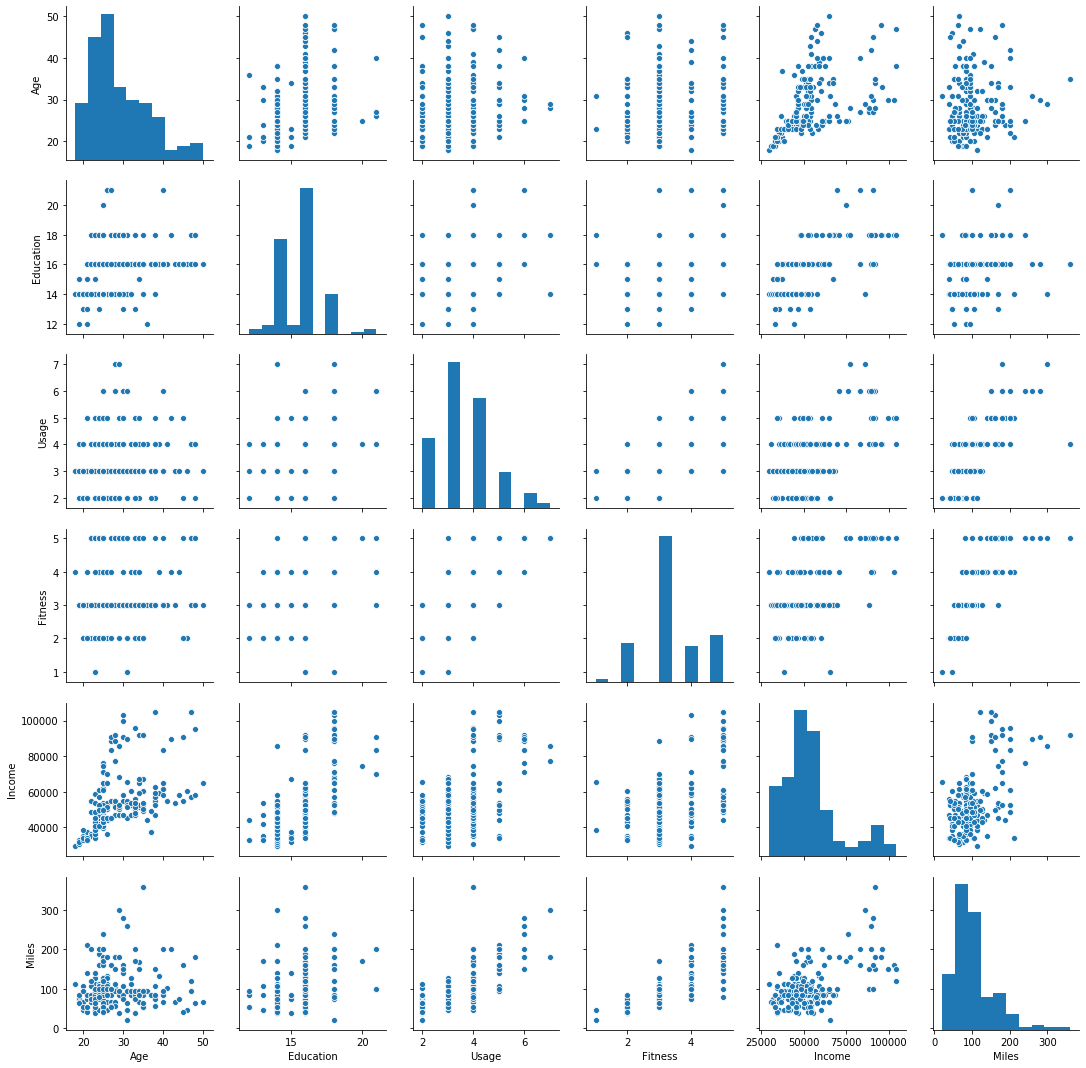

In [18]:
# Looking at the relationship between numerical variables using pair plots and correlation plots
sns.pairplot(cardiogf)

In [19]:
correlation = cardiogf.corr()
correlation

,Age,Education,Usage,Income,Miles
Age,1.00000,0.28050,0.01506,0.51341,0.03662
Education,0.28050,1.00000,0.39516,0.62583,0.30728
Usage,0.01506,0.39516,1.00000,0.51954,0.75913
Income,0.51341,0.62583,0.51954,1.00000,0.54347
Miles,0.03662,0.30728,0.75913,0.54347,1.00000


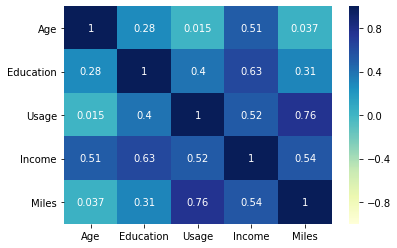

In [20]:
sns.heatmap(correlation, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)

#### Observations:

1. There are not so high correlations between these values.
2. We can see a certain correlation when analyzing the value of Income, showing a medium correlation with all other values. 
3. For obvious reasons, Usage and Miles have a high correlation

## Creating a new column "Age Period Decade" to separate the column "Age" into 3 Groups.  
1. Dec_2 = Age 18 to 29
2. Dec_3 = Age 30 to 39
3. Dec_4 = Age 40 to 50

#### Observation: 
Separating the column Age will help the analysis of the targeted consumer.

In [109]:
conditions = [
    (cardiogf["Age"] <= 29),
    (cardiogf["Age"] >= 30) & (cardiogf["Age"] <= 39),
    (cardiogf["Age"] >= 40) & (cardiogf["Age"] <= 50),
    ]
values = ['dec_2', 'dec_3', 'dec_4']
cardiogf['AgePeriodDecade'] = np.select(conditions, values)
cardiogf.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgePeriodDecade
0,TM195,18,Male,14,Single,3,4,29562,112,dec_2
1,TM195,19,Male,15,Single,2,3,31836,75,dec_2
2,TM195,19,Female,14,Partnered,4,3,30699,66,dec_2
3,TM195,19,Male,12,Single,3,3,32973,85,dec_2
4,TM195,20,Male,13,Partnered,4,2,35247,47,dec_2


In [110]:
# Check new column
cardiogf.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'AgePeriodDecade'],
      dtype='object')

In [24]:
# Validation of row in the new column
cardiogf[[ 'Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'AgePeriodDecade']]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgePeriodDecade
0,TM195,18,Male,14,Single,3,4,29562,112,dec_2
1,TM195,19,Male,15,Single,2,3,31836,75,dec_2
2,TM195,19,Female,14,Partnered,4,3,30699,66,dec_2
3,TM195,19,Male,12,Single,3,3,32973,85,dec_2
4,TM195,20,Male,13,Partnered,4,2,35247,47,dec_2
5,TM195,20,Female,14,Partnered,3,3,32973,66,dec_2
6,TM195,21,Female,14,Partnered,3,3,35247,75,dec_2
7,TM195,21,Male,13,Single,3,3,32973,85,dec_2
8,TM195,21,Male,15,Single,5,4,35247,141,dec_2
9,TM195,21,Female,15,Partnered,2,3,37521,85,dec_2


In [106]:
# Count the group of the value added: Age Period Decade
age_period_dec = cardiogf['AgePeriodDecade'].value_counts()
age_period_dec

dec_2    113
dec_3     50
dec_4     17
Name: AgePeriodDecade, dtype: int64

#### Observations: 
1. The group of consumers with age between 18 to 29 tend to search for treadmill products. 
2. When age increases, the interest in this product decreases.

In [82]:
# Count the different Genders
gender_num = cardiogf['Gender'].value_counts()
gender_num

Male      104
Female     76
Name: Gender, dtype: int64

In [84]:
#Percentage total gender
gender_perc = gender_num*100/180
gender_perc

Male     57.77778
Female   42.22222
Name: Gender, dtype: float64

### Observation:
The Male group has number of consumers bigger than the Female group.

In [107]:
# Count the different Genders
product_num = cardiogf['Product'].value_counts()
product_num

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [28]:
# Count the total Marital Status
cardiogf['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

#### Observation: 
Partners tend to buy this products more than a Single person.

In [119]:
# Count the total Marital Status by Product
(cardiogf.groupby('MaritalStatus')['Product'].agg(['value_counts']))

value_counts
MaritalStatus Product              
Partnered     TM195              48
              TM498              36
              TM798              23
Single        TM195              32
              TM498              24
              TM798              17

In [69]:
# Count the total of Education Years of the customer
edu_level = cardiogf['Education'].value_counts()
edu_level

16    85
14    55
18    23
15     5
13     5
21     3
12     3
20     1
Name: Education, dtype: int64

In [71]:
# Percentage of Education Level distributed on the  customers
edu_level*100/180

16   47.22222
14   30.55556
18   12.77778
15    2.77778
13    2.77778
21    1.66667
12    1.66667
20    0.55556
Name: Education, dtype: float64

### Observations: 
1. 1.6% has the highest education with 21 years studying 
2. 1.6% has the lowest educations with 12 years studying
3. The major of the population 47.22% has medium/high education with 16 years of studying. Followed by 30.5% of the population who have 14 years of studying. 

In [30]:
# Count the total rate of fitness score self rated by customer (5 - very fit, 1 - very unfit)
fit_level = cardiogf['Fitness'].value_counts()
fit_level

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [31]:
# Percentage of Fitness Score 
percentage = fit_level*100/180
percentage

3   53.88889
5   17.22222
2   14.44444
4   13.33333
1    1.11111
Name: Fitness, dtype: float64

#### Observations:
1. 53.8% self rated as medium score, rate 3. This means 97 customers of 180.
2. 17.2% self rated as high score, rate 5. This means 31 customers of 180.
3. 1.1% self rated as low score, rate 1. This means 2 customers of 180.

In [32]:
# Check Fitness Score by Gender
(cardiogf.groupby('Gender')['Fitness'].agg(['value_counts']))

value_counts
Gender Fitness              
Female 3                  45
       2                  16
       4                   8
       5                   6
       1                   1
Male   3                  52
       5                  25
       4                  16
       2                  10
       1                   1

#### Observations: 
1. The Male group shows more number of people in the very fit score than the Female group. While Male very fit are 25 people, for Female are 6. 
2. The major of the Female and Male groups consider themselves as medium fit, rated 45 Females inside rate 3, while Male are 52 people.

In [33]:
# Count Marital Status by Gender 
(cardiogf.groupby('MaritalStatus')['Gender'].agg(['value_counts']))

value_counts
MaritalStatus Gender              
Partnered     Male              61
              Female            46
Single        Male              43
              Female            30

#### Observations: 

1. A Male inside a relationship is more interested in having treadmill than a single man.
2. The females inside a relationship tend to have the same behavior. 

In [34]:
# Check the Education by Gender
(cardiogf.groupby('Gender')['Education']
         .agg(['min','max','mean']))

,min,max,mean
Gender,,,
Female,13,21,15.39474
Male,12,21,15.70192


#### Observation:
The Female and Male Groups have a very similar education level.

In [35]:
# Check the Total Usage (hours weekly) by Gender
(cardiogf.groupby('Gender')['Usage']
         .agg(['count','sum','mean','mad']))

,count,sum,mean,mad
Gender,,,,
Female,76,242,3.18421,0.78324
Male,104,380,3.65385,0.86612


#### Observations:
1. The average usage between Females and Males is almost the same.
2. Although the Male group is bigger than the Female group.

In [66]:
# Check the total Usage per week
cardiogf['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [63]:
# Check the Usage per week by gender
(cardiogf.groupby('Usage')['Gender'].agg(['value_counts']))

value_counts
Usage Gender              
2     Female            20
      Male              13
3     Male              36
      Female            33
4     Male              38
      Female            14
5     Male              10
      Female             7
6     Male               5
      Female             2
7     Male               2

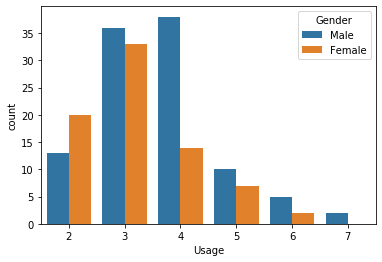

In [61]:
# Check the number of hours by week used by Gender
sns.countplot(cardiogf['Usage'], hue = cardiogf['Gender'])
plt.show()

### Observations: 
1. The Female Group tend to dedicate a period of 2 to 3 hours by week.
2. The Male Group tend to dedicate daily, with expressive usage 4 hours weekly.

In [37]:
# Count the number of each product per Gender
(cardiogf.groupby('Gender')['Product']
         .agg(['value_counts']))

value_counts
Gender Product              
Female TM195              40
       TM498              29
       TM798               7
Male   TM195              40
       TM798              33
       TM498              31

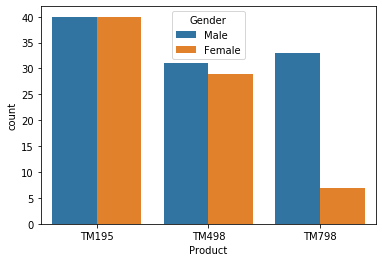

In [38]:
#Visualization of each product per Gender
sns.countplot(cardiogf['Product'], hue = cardiogf['Gender'])
plt.show()

#### Observation:
1. The Male and Female groups equally buy the product TM195.
2. The Male group buys more of the product TM498 than the Female group, but with a very small difference.
3. The Male group buy more the product TM798 than the Female Group, with an expressive difference.

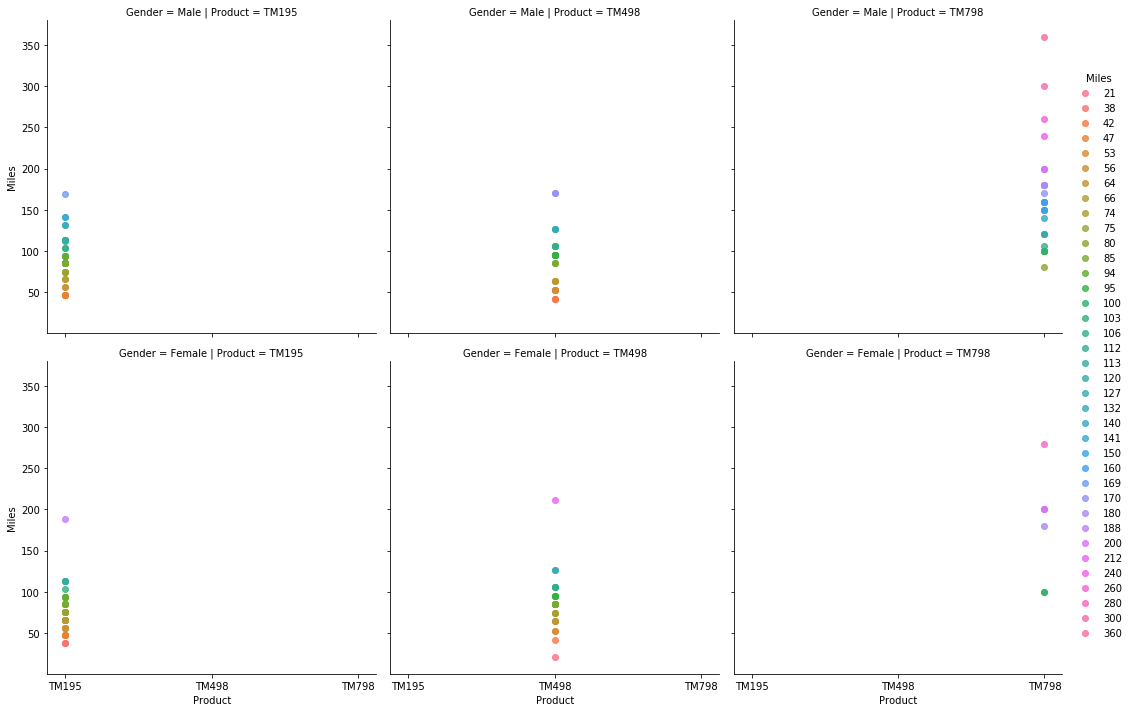

In [39]:
sns.lmplot(x='Product',y='Miles',data=cardiogf,fit_reg= False,hue='Miles',row='Gender',col='Product')
plt.show()

#### Observation:
Visualization of the miles run by each product per Gender

In [100]:
# Count how many each products are sold per Age Group
(cardiogf.groupby('Product')['AgePeriodDecade']
         .agg(['value_counts']))

value_counts
Product AgePeriodDecade              
TM195   dec_2                      53
        dec_3                      20
        dec_4                       7
TM498   dec_2                      33
        dec_3                      22
        dec_4                       5
TM798   dec_2                      27
        dec_3                       8
        dec_4                       5

#### Observation:
1. The consumers with age between 18 to 29 years old will have a focus on the products: very first TM195, TM498, last TM798
2. The consumers with age between 30 to 39 years old will have a focus on the products: TM498, TM198, very last TM798
3. The consumers with age between 40 to 50 yeard old will have a focus on the products: TM195, TM498 and TM798 equal

In [105]:
# Age Period Decade distribuited by Gender
age_gender = (cardiogf.groupby('Gender')['AgePeriodDecade']
         .agg(['value_counts']))
age_gender

value_counts
Gender AgePeriodDecade              
Female dec_2                      48
       dec_3                      23
       dec_4                       5
Male   dec_2                      65
       dec_3                      27
       dec_4                      12

In [43]:
age_gender_perc = age_gender*100/180
age_gender_perc

value_counts
Gender AgePeriodDecade              
Female dec_2                26.66667
       dec_3                12.77778
       dec_4                 2.77778
Male   dec_2                36.11111
       dec_3                15.00000
       dec_4                 6.66667

#### Observations: 

1. Age group 18 to 29 = Female: 26.6% while Male 36.1%
2. Age group 30 to 39 = Female: 12.7% while Male 15%
3. Age group 40 to 50 = Female: 2.7% while Male 6.6%

In [44]:
# Check the Income per Gender
(cardiogf.groupby('Gender')['Income']
         .agg(['mean','sum'])
         .style.format('${0:,.2f}'))

,mean,sum
Gender,,
Female,"$49,828.91","$3,786,997.00"
Male,"$56,562.76","$5,882,527.00"


#### Observation:
The Male group has higher Income than Female Group

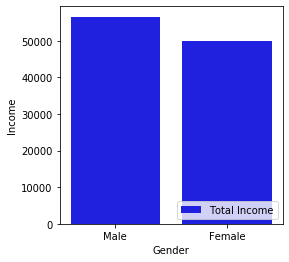

In [45]:
plt.figure(figsize = (4,4)) # To resize the plot

# Plot total Income per Gender
sns.barplot(x="Gender", y="Income", data=cardiogf.sort_values("Product", ascending=False),
            label="Total Income", color="b", ci=None)

# Add a legend
plt.legend(ncol=3, loc="lower right", frameon=True)
plt.show()

#### Observation:
The visualizaion of the Income per Gender

In [46]:
# Check the Product and Miles run
(cardiogf.groupby('Product')['Miles']
         .agg(['mean','count']))

,mean,count
Product,,
TM195,82.78750,80
TM498,87.93333,60
TM798,166.90000,40


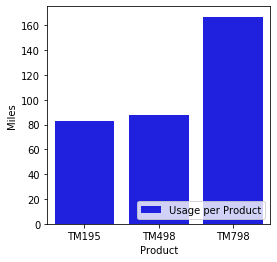

In [47]:
plt.figure(figsize = (4,4)) # To resize the plot

# Plot total Usage per Product
sns.barplot(x="Product", y="Miles", data=cardiogf.sort_values("Gender", ascending=False),
            label="Usage per Product", color="b", ci=None)

# Add a legend
plt.legend(ncol=3, loc="lower right", frameon=True)
plt.show()

#### Observations:
Although the Product TM195 is the most sold, (see: Count of each products) the product TM798 is more used.

In [48]:
# Check supposed price for each product
(cardiogf.groupby('Product')['Income']
         .agg(['mean','sum'])
         .style.format('${0:,.2f}'))

,mean,sum
Product,,
TM195,"$46,418.03","$3,713,442.00"
TM498,"$48,973.65","$2,938,419.00"
TM798,"$75,441.57","$3,017,663.00"


In [49]:
# Check price for each product relating count of each product
(cardiogf.groupby('Product')['Income']
         .agg(['count','mean','sum']))
         ##.style.format('${0:,.2f}'))

,count,mean,sum
Product,,,
TM195,80,46418.02500,3713442
TM498,60,48973.65000,2938419
TM798,40,75441.57500,3017663


#### Observation: 
   1. We can understand the product TM195 has been more sold due to the better price
   2. The product TM798 is more expensive and more used, bringing the idea the consumer engaged in the sport tend to invest more dollar amount. However is not the product that sold the most.
   3. 40 units of the product TM798 were sold, to returns $3,017,663. While 80 units of the product TM195 were sold to return $3,713,442. (It is necessary to investigate further details, to better confirm this analysis.)

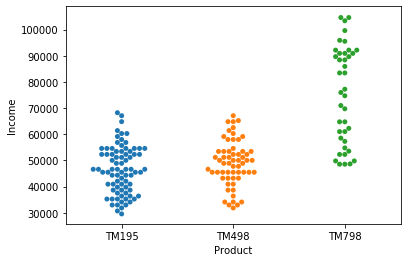

In [50]:
#shows distribution of data points, between each product and Income.
sns.swarmplot(x='Product',y='Income',data=cardiogf)
plt.show()

#### Observation:
The product TM798 has a higher bill amount, but not so much attractive as the Product TM195.

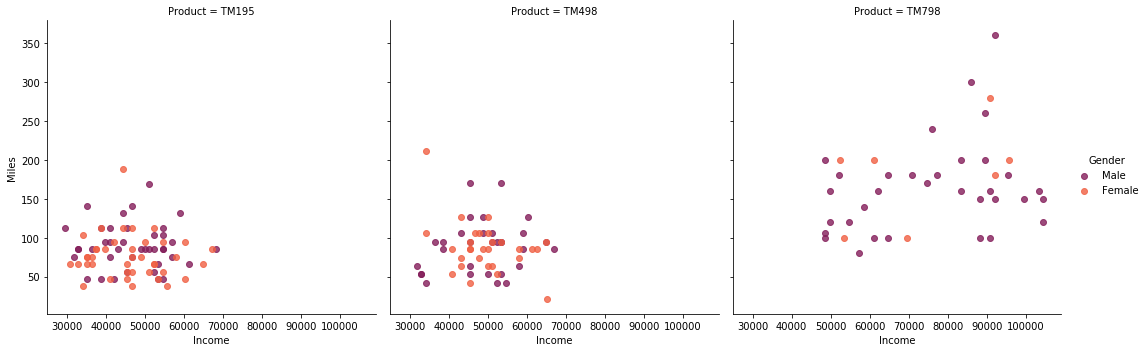

In [56]:
# Check what Population (Female or Male) tend to pay more for each product
sns.lmplot(x='Income',y='Miles',data=cardiogf,fit_reg=False,hue='Gender',col='Product',palette='rocket')
plt.show()

#### Observations: 
1. For TM195: The Female group tends to invest a slightly more amount than Male. 
2. For TM498: The Male group tends to invest a slightly more amount than Female. 
3. For TM798: The Male group tend to invest more amount than Female. 

## Customer Profile:

#### Products: TM195, TM498, TM798
#### Clients: 
##### Female 76 - 42.2%
##### Male: 104 - 57.7%

TM195: 80
Female: 40 count
Male: 40 count
Partnered: 48
Single: 32

TM498: 60
Female: 29 count
Male: 31 count
Partnered: 36
Single: 24

TM798: 40
Female: 7
Male: 33
Partnered: 23
Single: 17

#### Marital Status: 
1. A Male inside a relationship is more interested in having treadmill than a single man.
2. The females inside a relationship tend to have the same behavior.

#### Educational Level: 
3. 1.6% has the highest education with 21 years studying
4. 1.6% has the lowest educations with 12 years studying
5. The major of the population 47.22% has medium/high education with 16 years of studying. Followed by 30.5% of the population who have 14 years of studying.

#### Fitness Score: 
6. 53.8% self rated as medium score, rate 3. This means 97 customers of 180.
7. 17.2% self rated as high score, rate 5. This means 31 customers of 180.
8. 1.1% self rated as low score, rate 1. This means 2 customers of 180.

9. The Male group shows more number of people in the very fit score than the Female group. While Male very fit are 25 people, for Female are 6.
10. The major of the Female and Male groups consider themselves as medium fit, rated 45 Females inside rate 3, while Male are 52 people.

#### Usage: 
11. The Female Group tend to dedicate a period of 2 to 3 hours by week.
12. The Male Group tend to dedicate daily, with expressive usage 4 hours weekly.

#### Age
13. The consumers with age between 18 to 29 years old will have a focus on the products: very first TM195, TM498, last TM798
14. The consumers with age between 30 to 39 years old will have a focus on the products: TM498, TM198, very last TM798
15. The consumers with age between 40 to 50 yeard old will have a focus on the products: TM195, TM498 and TM798 equa

16. Age group 18 to 29 = Female: 26.6% while Male 36.1%
17. Age group 30 to 39 = Female: 12.7% while Male 15%
18. Age group 40 to 50 = Female: 2.7% while Male 6.6%

#### Income: 
19. The Male group has higher Income than Female Group

# Conclusion
1. Females and Males are potential customers and the communication must be different to achieve the interest of Singles and Non-singles people. Also, is impportant to differentiate the communication by the age group. 
2. There is a relationship between Education and Income, so probably the vehicle of communication should be thinking about those characteristics. This population will be looking for high quality services, food, locations, channels, etc. Is not a bad idea to "Married" web ads with other companies that target the same clients like the grocery store Whole Foods. 
3. Basic customers are inside the group of age 18 to 29 years old and tend to buy low-cost products. However, there are potential clients between 40 to 50 years old with high income that is looking for high-quality sales. This population today brings a high dollar amount in sales and must be targeted with very specific communication. 
4. The number of females slightly decreases when this population ages, making the product TM798 very particular to be purchased by the male population. However, I suggest to keep the analysis and understand why the female group loses interest.  And then to work to communicate the positive achievements if maintaining the same routine after ages.  